In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
from adjustText import adjust_text

---

# Visualisation Analysis of Players Statistical Data Up Until and Including Round 21 in the 2020-21 Season

---

### First, we read the gameweeks CSV and observe the columns. This makes it easier to spot columns which may be able to be visualised.

In [2]:
path = '/Users/danielheaver/Desktop/projects/fantasy_football_predictions/'
gameweeks = pd.read_csv(path + 'CSV/all_gameweeks.csv')
print(gameweeks.columns)

Index(['season', 'name', 'position', 'value', 'adjusted_points', 'assists',
       'goals_scored', 'goals_conceded', 'saves', 'own_goals',
       'penalties_missed', 'penalties_saved', 'clean_sheets', 'creativity',
       'threat', 'influence', 'bps', 'minutes', 'yellow_cards', 'red_cards',
       'plays_for', 'opponent_team', 'was_home', 'won', 'month_of_match',
       'time_of_match', 'win_expectation', 'mean_points', 'mean_creativity',
       'mean_threat', 'mean_influence', 'mean_bps', 'mean_goals',
       'mean_assists', 'mean_conceded', 'shift_opponent',
       'shift_win_expectation', 'shift_month_of_match', 'shift_time_of_match',
       'shift_was_home', 'shift_mean_points', 'shift_mean_creativity',
       'shift_mean_threat', 'shift_mean_influence', 'shift_mean_bps',
       'shift_mean_goals', 'shift_mean_assists', 'shift_mean_conceded',
       'round', 'date_of_match', 'points_against_shift_opponent',
       'creativity_against_shift_opponent', 'threat_against_shift_opponent'

In [3]:
max(gameweeks[gameweeks["season"]=="2020-21"]["round"])

21

---

### By grouping the gameweeks dataframe by position, we can see the average stats of each position. Iterating through these stats I plotted each statistic separately in a bar plot, whilst keeping the order of the positions the same. 

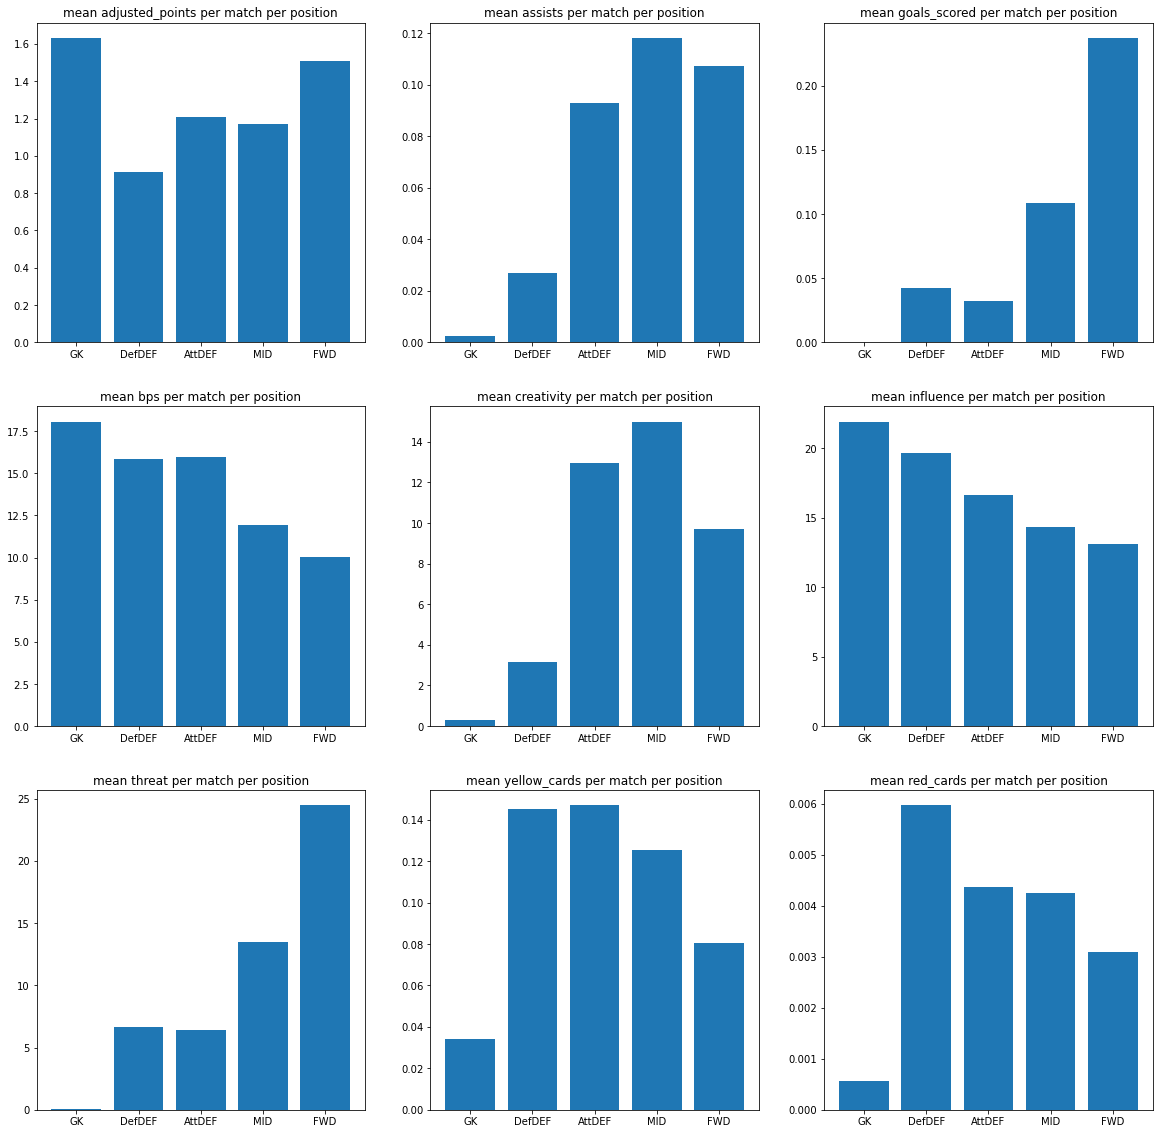

In [4]:
positions = gameweeks.groupby('position')[['adjusted_points', 'assists', 'goals_scored', 'bps', 'creativity', 'influence', 'threat', 'yellow_cards', 'red_cards']].mean().reindex(['GK', 'DefDEF', 'AttDEF', 'MID', 'FWD'])

plot_positions = [list(position) for position in product([0, 1, 2], repeat=2)]

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))

for i, column in enumerate(positions.columns):
    plot = plot_positions[i]
    ax[plot[0], plot[1]].bar(positions.index, height=positions[column])
    ax[plot[0], plot[1]].set_title('mean {} per match per position'.format(column))

plt.savefig('IMAGES/mean_stats_per_position.png')
plt.show()

### Looking at the mean adjusted points and the bps score, with the goalkeeper averaging the most performance points per game. However, the gameweeks dataframe only includes players who have played at least a minute in a game, so the sample size for goalkeepers will be very small. Also, if a goalkeeper is playing for a worse side, they will encounter shots more often and thus get performance points (potentially losing points if they concede), whilst if they play for a better side, they will be more likely to keep a clean sheet and get points.

### The mean assists and goals scored are to be expected, with the midfielders and forwards most involved. Of course, in the modern game, full backs are essential in creating goals, as reflected by the attacking defenders mean assists. Interestingly though, it is the defending defenders who score more goals, which makes sense due to their presence in set pieces.

### The yellow and red cards show a similar story, for the outfield players, the further back the pitch you are, the more likely you are to be carded. In fact, a defender has a 1 in 7 chance to be yellow carded every match.

### Looking at the creativity, influence and threat values, we notice that they follow the same trends as assists, bps score and goals scored respectively. I therefore made the decision to plot these against each other, so we can get a better idea at which players had the most effect on the matches they played.

---

### To start I grouped the gameweeks dataframe by season and then by name.  The sums dataframe gives us every players statistics over the full season, whilst the means dataframe looks at players average performance over the season (and also allowing us to compare some players 2020-21 stats to previous seasons and see where they might be expected to finish). Of course, players who have played only a few games in a season may have perfect means, so I only included players who made at least 5 appearances in a season.

In [5]:
players_totals = gameweeks.groupby(['season', 'name']).sum().reset_index()

counts = gameweeks.groupby(['season', 'name']).count()
players_means = gameweeks.groupby(['season', 'name']).mean()[(counts['position']>=5)].reset_index()

---

### By plotting a players total creativity against their total assists over a season we can see how many assists you should have expected given your total creativity. I also annotated the top 15 creativive players and the top 15 assisters over the 4 seasons.

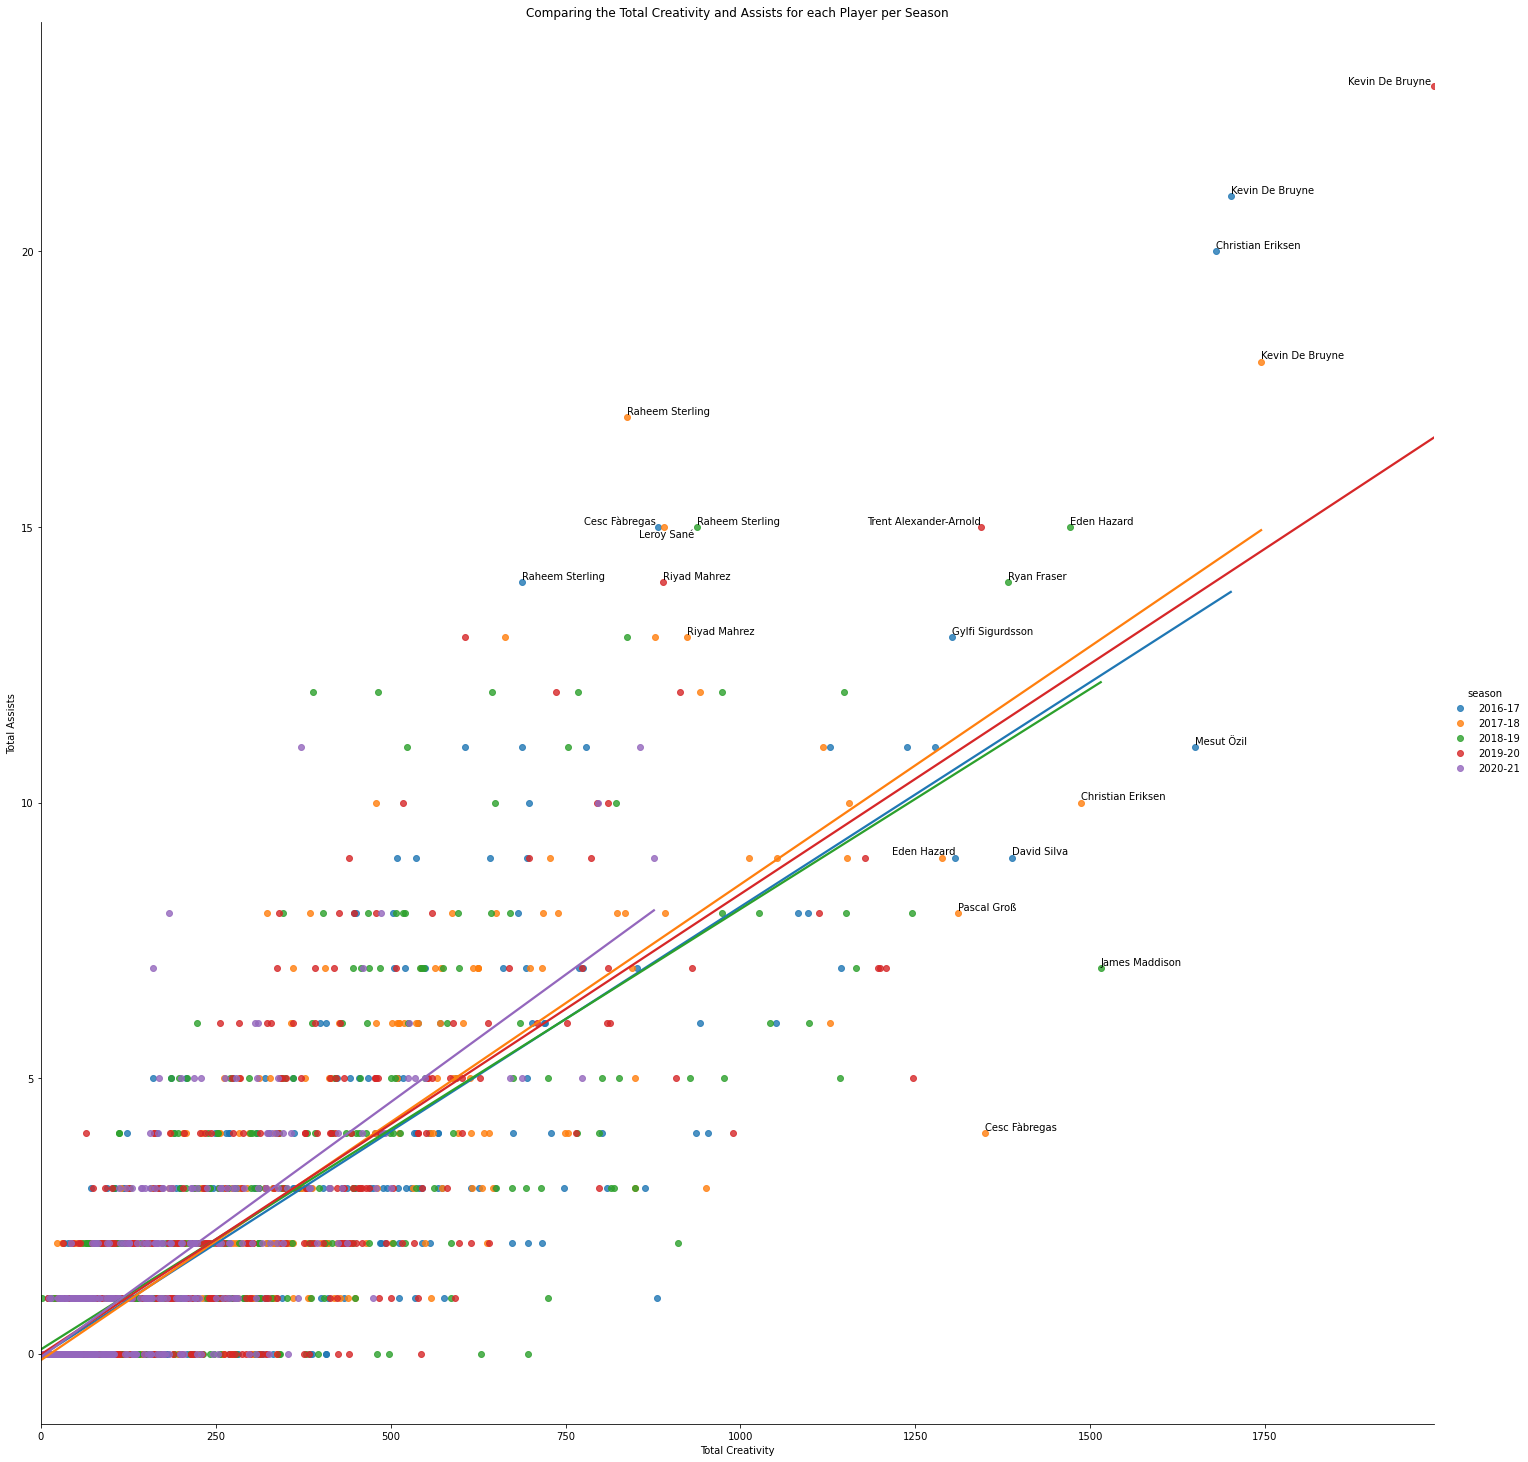

In [6]:
most_total_creative = players_totals.sort_values(by=['creativity', 'assists'], ascending=False)[:15]
most_total_assists = players_totals.sort_values(by=['assists', 'creativity'], ascending=False)[:15]

total_ca_annotations = pd.concat([most_total_creative, most_total_assists]).drop_duplicates()

fgrid = sns.lmplot(data=players_totals, x='creativity', y='assists', hue='season', ci=None, height=20);
ax = fgrid.axes[0, 0]
plt.title('Comparing the Total Creativity and Assists for each Player per Season')

total_ca_texts = []
for i, row in total_ca_annotations.iterrows():
    total_ca_texts.append(ax.annotate(row['name'], (row['creativity'], row['assists'])))

plt.xlabel('Total Creativity')
plt.ylabel('Total Assists')
adjust_text(total_ca_texts, only_move={'points': 'y', 'texts': 'y'})
plt.savefig('IMAGES/total_creativity_assists.png')
plt.show()

In [7]:
gameweeks[(gameweeks['name']=='Kevin De Bruyne') & (gameweeks['season']=='2018-19')][['round', 'minutes', 'creativity']].set_index('round').sort_index()

,minutes,creativity
round,,
1,30,14.8
9,32,15.7
10,19,1.1
17,15,9.1
18,28,24.6
19,69,18.3
22,28,24.3
23,90,57.5
24,64,26.3


### Looking at the plot the first thing we notice is Kevin De Bruyne. He is quite literally in a leauge of his own. In 3 of the 4 full seasons of data he is far and above the most creative player, only being joined by Christian Eriksen in the 2016-17 season. Also to note, in the 2018-19 season where De Bruyne is not seen in the annotations, he only managed to play 90 minutes 4 times as he was injured for much of the season, missing several periods of rounds.

### The best fit line for each season is also very similar, with a player expecting to get around 8-9 assists for 1000 total creativity. Although only half way through the season the 2020-21 season seems to suggest that you can expect more assists, suggesting that the chances are better or the finishing is more clinical.

### The lines also give us an idea on players who exceeded or underperformed the expectations of assists. The biggest underperformer is Cesc Fabregas in the 2017-18 season, who should have expected to get 11 assists, 7 more than the 4 he actually got. Kevin De Bruyne is the biggest overperformer, however having watched him play, the quality of his chances created should expect the assist numbers he achieves.

---

### To see how the 2020-21 stats really compare to previous seasons we need to compare the stats of each season up until the most recent round of the 2020-21 season. Having defined this dataframe, I then again grouped by season and name and found the sum and means (given they have made 5 appearances) of the statistics.

In [8]:
up_to_season = gameweeks[(gameweeks['round']<=max(gameweeks[(gameweeks['season']=='2020-21')]['round']))]

up_to_season_totals = up_to_season.groupby(['season', 'name']).sum().reset_index()

---

### I then again plotted the total creativity and assists, but only up until the most recent round in the 2020-21 season.

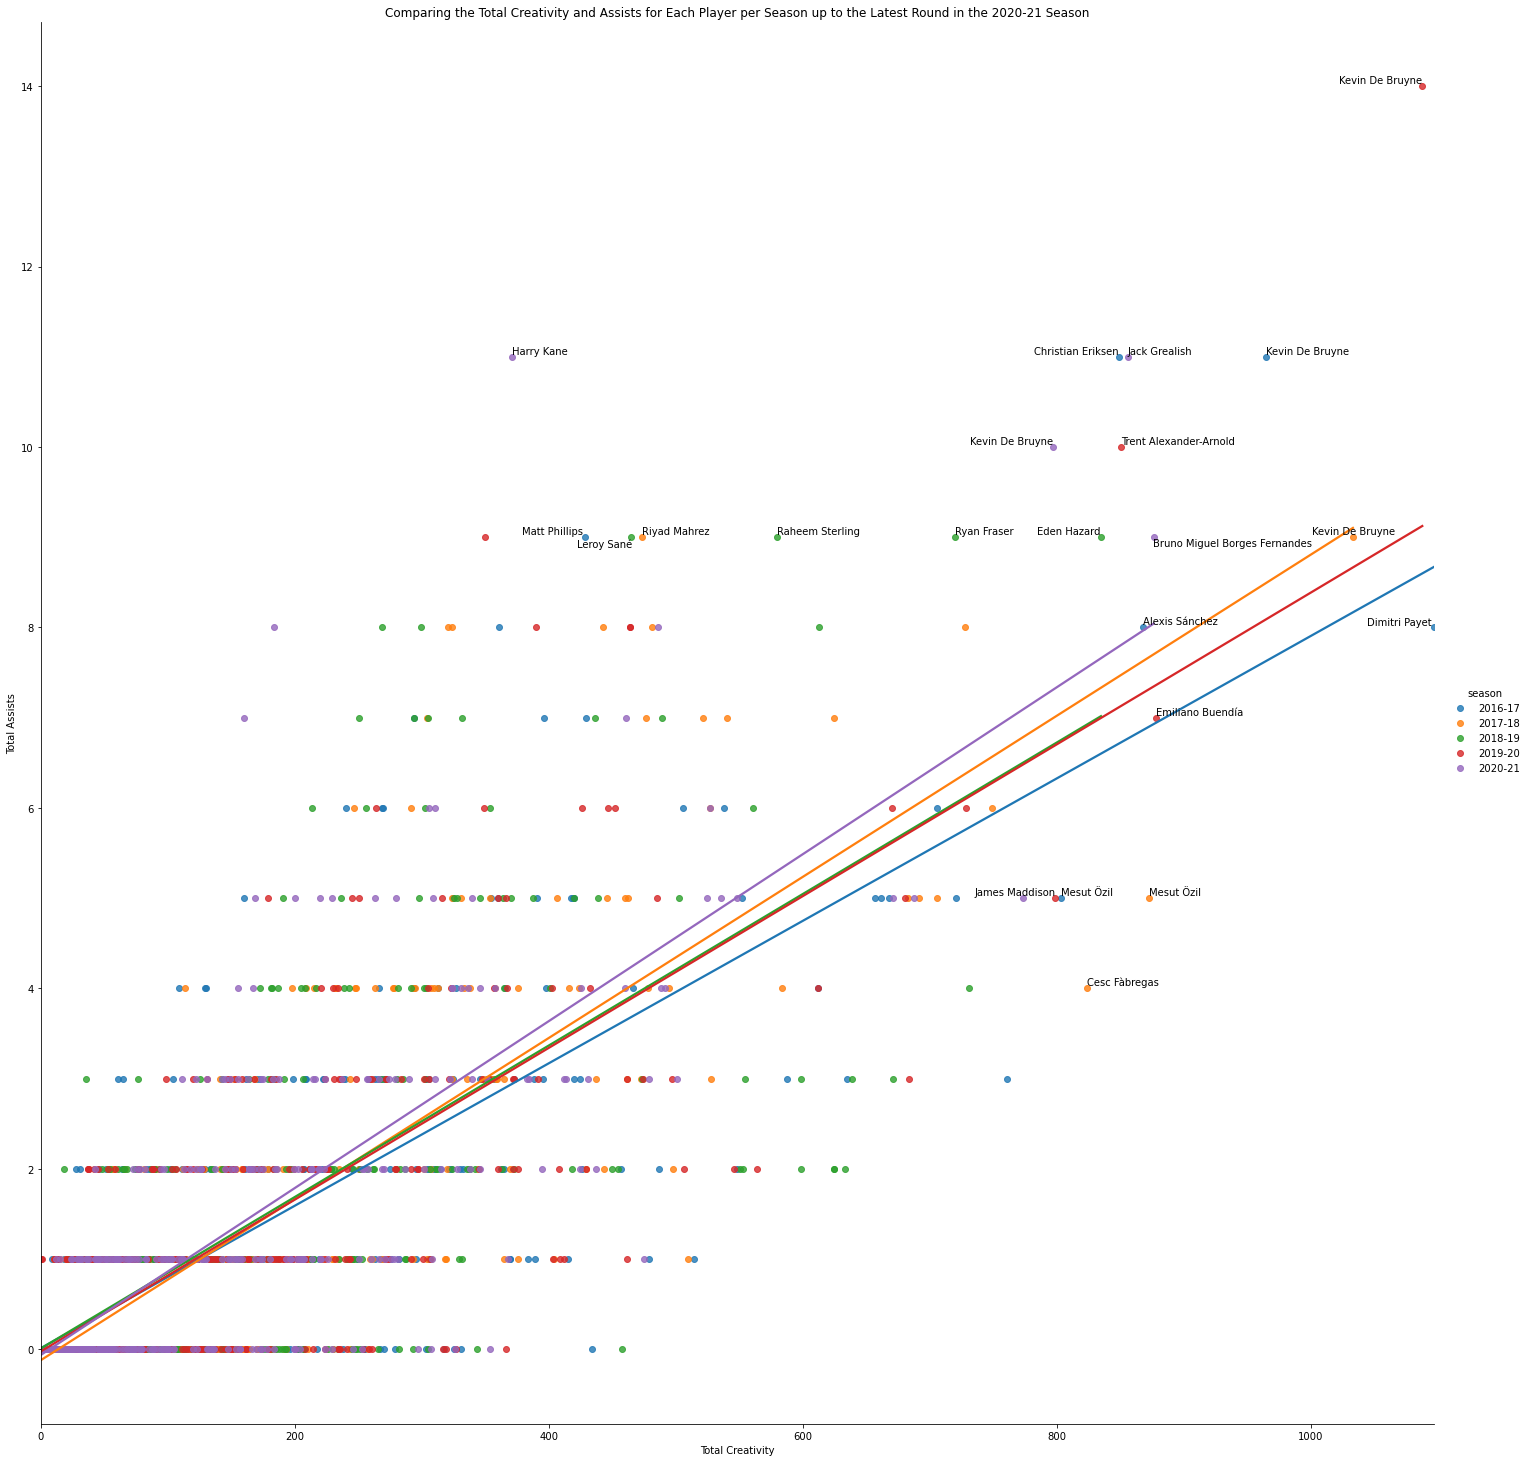

In [9]:
up_to_season_most_total_creative = up_to_season_totals.sort_values(by=['creativity', 'assists'], ascending=False)[:15]
up_to_season_most_total_assists = up_to_season_totals.sort_values(by=['assists', 'creativity'], ascending=False)[:15]

up_to_season_total_ca_annotations = pd.concat([up_to_season_most_total_creative, up_to_season_most_total_assists]).drop_duplicates()

fgrid = sns.lmplot(data=up_to_season_totals, x='creativity', y='assists', hue='season', ci=None, height=20);
ax = fgrid.axes[0, 0]
plt.title('Comparing the Total Creativity and Assists for Each Player per Season up to the Latest Round in the 2020-21 Season')

up_to_season_total_ca_texts = []
for i, row in up_to_season_total_ca_annotations.iterrows():
    up_to_season_total_ca_texts.append(ax.annotate(row['name'], (row['creativity'], row['assists'])))

plt.xlabel('Total Creativity')
plt.ylabel('Total Assists')
adjust_text(up_to_season_total_ca_texts, only_move={'points': 'y', 'texts': 'y'})
plt.savefig('IMAGES/up_to_season_total_creativity_assists.png')
plt.show()

In [10]:
gameweeks[(gameweeks['name'] == 'Dimitri Payet') & (gameweeks['season'] == '2016-17')][['round', 'minutes', 'creativity']].set_index('round').sort_index()

,minutes,creativity
round,,
1,24,15.7
4,90,76.6
5,90,101.3
6,90,35.8
7,90,77.6
8,77,52.0
9,90,99.7
10,90,44.9
11,90,101.4


### Looking at the plot, we can see that it shows a similar story to the previous plot, that a player playing in the 2020-21 season can expet more assists for their creative play. It is also interesting to see that the best fit lines are more spread out up till this time in the season, suggesting that the number of assists you can expect to get for your creativity drops in the second half of the season.

### Looking at the player annotations in this plot we see some unfamiliar faces, namely Dimitri Payet. During his time in the Premier League, Dimitri Payet was unplayable. This is evidented by the fact that he had the highest creativity sum up to this stage in the season out of any players in any of the 5 seasons, including Kevin De Bruyne, and perhaps if he was playing for a better team than West Ham, would have recorded more assists. The reason that Payet did not continue this form for the rest of the season, is that he was struck with injury. As we can see from Payet's games played in this season, he did not participate in any game after round 20.

### Looking at the 2020-21 season, Harry Kane has recorded as many assists as Kevin De Bruyne at this stage of the season when he tied the assists record in the 2019-20 season. However, De Bruyne also achieved this many assists in 2016-17, but with much less creativity, and thus didn't get the assists record. This suggests Harry Kane assists will dry up, but we will have to wait and see.

### Finally, the best fit line for the 2020-21 season is noticeably shorter than the other seasons. This suggests that the creativity and therefore assists has dropped this season. Being aware of real life circumstances, we can attribute this to COVID-19, which has resulted in games being played behind closed doors and many other changes to game the players will be accustomed to.

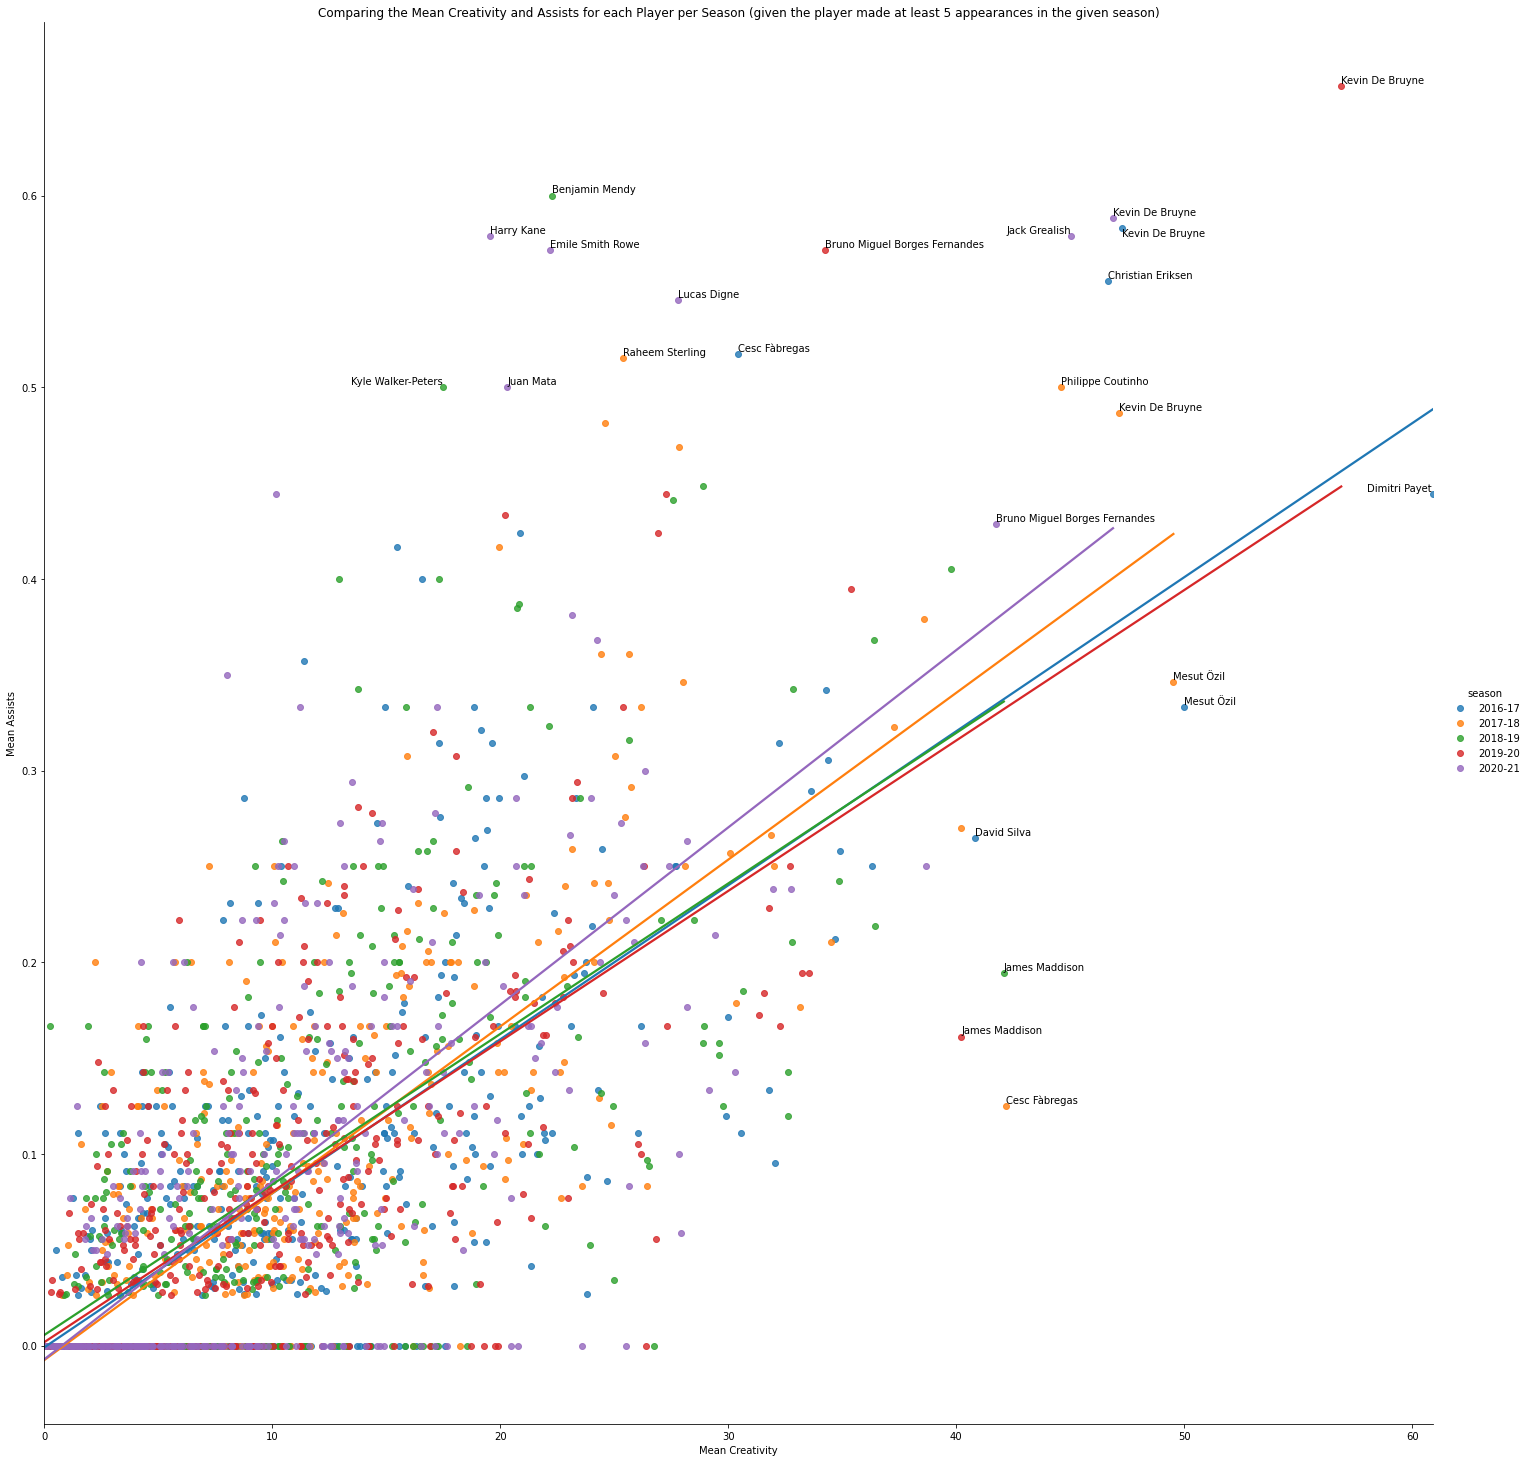

In [11]:
most_mean_creative = players_means.sort_values(by=['creativity', 'assists'], ascending=False)[:15]
most_mean_assists = players_means.sort_values(by=['assists', 'creativity'], ascending=False)[:15]

mean_ca_annotations = pd.concat([most_mean_creative, most_mean_assists]).drop_duplicates()

fgrid = sns.lmplot(data=players_means, x='creativity', y='assists', hue='season', ci=None, height=20);
ax = fgrid.axes[0, 0]
plt.title('Comparing the Mean Creativity and Assists for each Player per Season (given the player made at least 5 appearances in the given season)')

mean_ca_texts = []
for i, row in mean_ca_annotations.iterrows():
    mean_ca_texts.append(ax.annotate(row['name'], (row['creativity'], row['assists'])))

plt.xlabel('Mean Creativity') 
plt.ylabel('Mean Assists')
adjust_text(mean_ca_texts, only_move={'points': 'y', 'texts': 'y'})
plt.savefig('IMAGES/mean_creativity_assists.png')
plt.show()

### Another way to compare this seasons statistics to previous seasons is to compare a players mean creativity and assists per appearance they make. Looking at the plot we notice a similar trend to the previous plots, that the creativity needed to get an assist is less (resulting in a steeper line of best fit), yet the mean number of assists is lower than the previous 4 seasons (with the line being shorter).

### Harry Kane, Emile Smith Rowe and Lucas Digne have a very good mean assists return. Both Harry Kane and Lucas Digne have been consistant points returners in the previous 4 seasons, yet Emile Smith Rowe has recently come into the fold, making an instant impact to a struggling Arsenal squad.

---

### In a similar fashion to the creativity and assists, I plotted the same three plots comparing a players threat and goals scored, as well as their influence and BPS score.

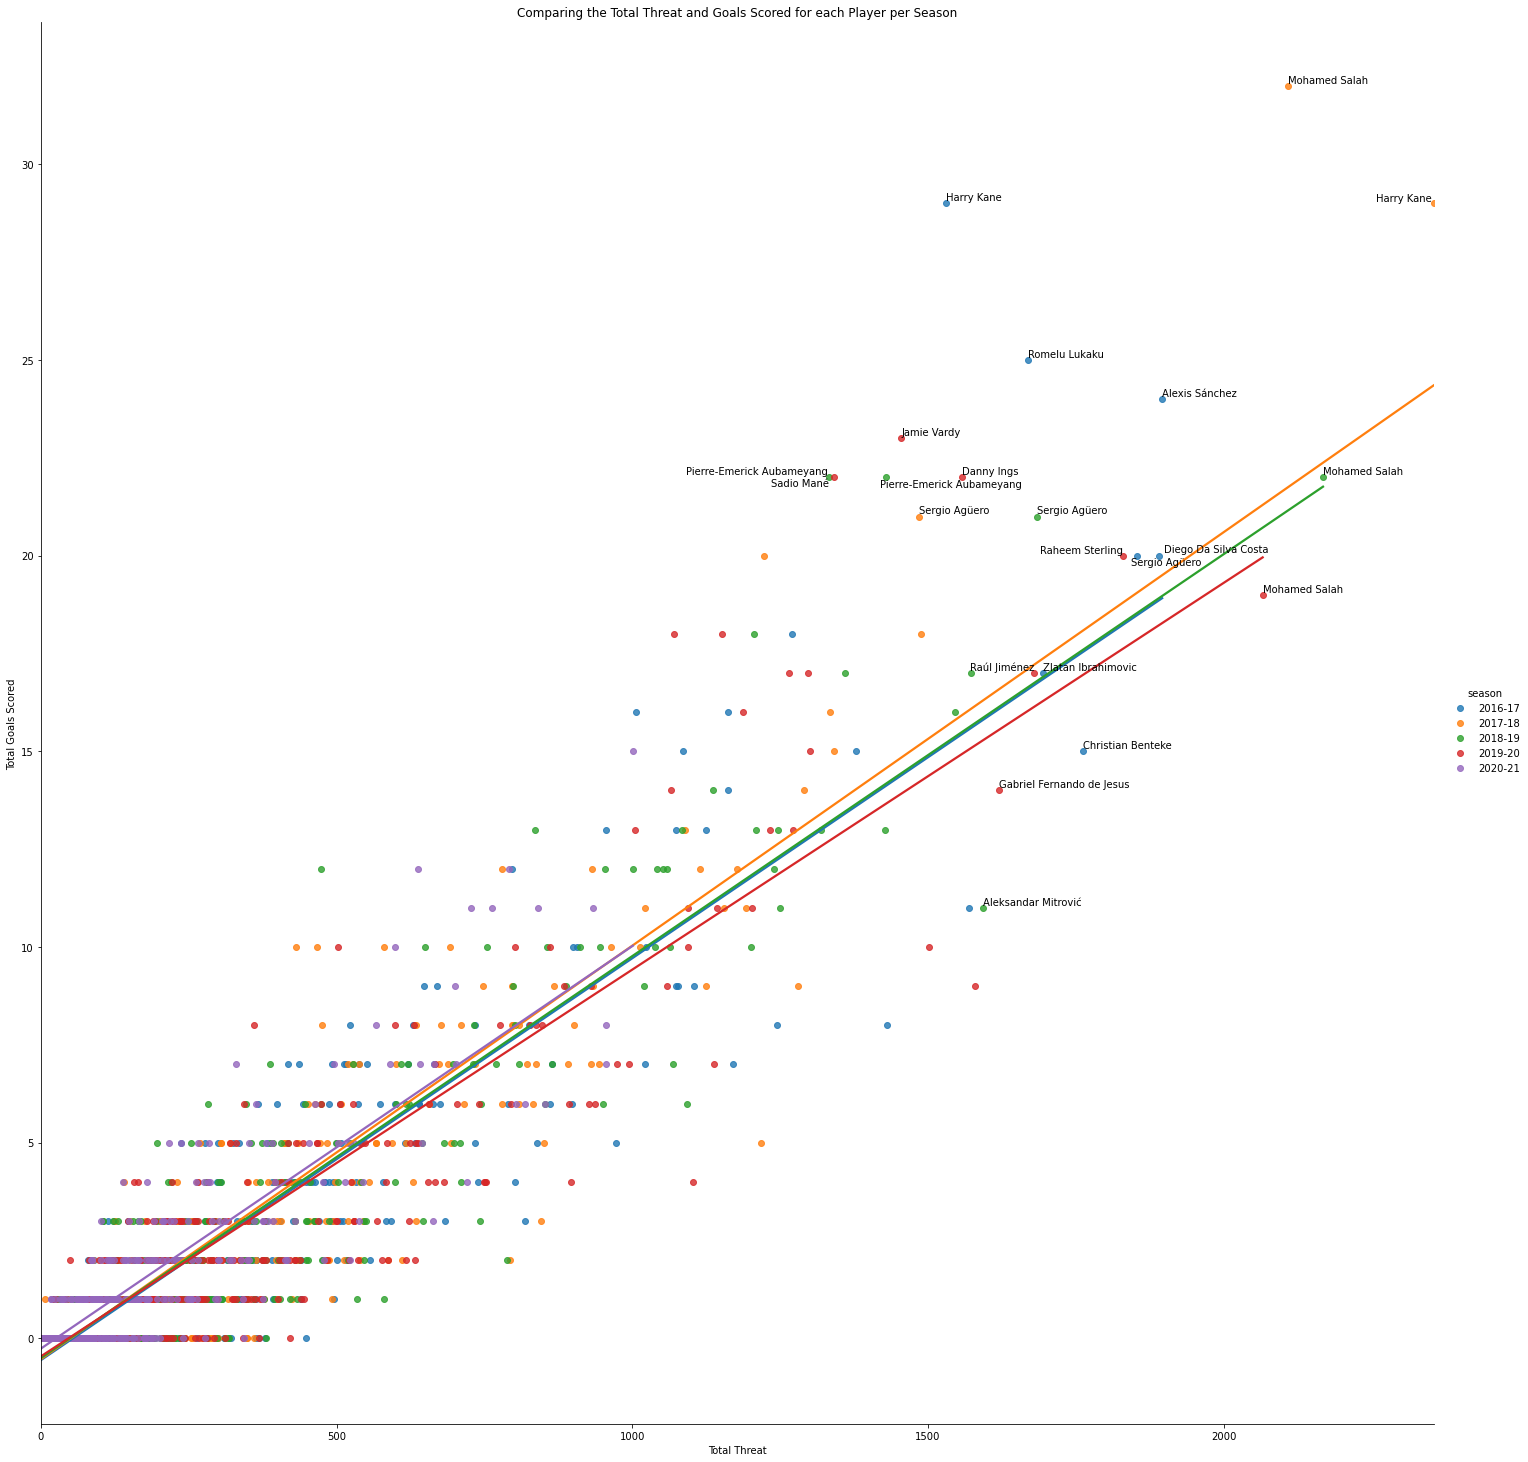

In [12]:
most_threat = players_totals.sort_values(by=['threat', 'goals_scored'], ascending=False)[:15]
most_goals = players_totals.sort_values(by=['goals_scored', 'threat'], ascending=False)[:15]

tg_annotations = pd.concat([most_threat, most_goals]).drop_duplicates()

fgrid = sns.lmplot(data=players_totals, x='threat', y='goals_scored', hue='season', ci=None, height=20);
ax = fgrid.axes[0, 0]
plt.title('Comparing the Total Threat and Goals Scored for each Player per Season')

tg_texts = []
for i, row in tg_annotations.iterrows():
    tg_texts.append(ax.annotate(row['name'], (row['threat'], row['goals_scored'])))

plt.xlabel('Total Threat')
plt.ylabel('Total Goals Scored')
adjust_text(tg_texts, only_move={'points': 'y', 'texts': 'y'})
plt.savefig('IMAGES/total_threat_goals_scored.png')
plt.show()

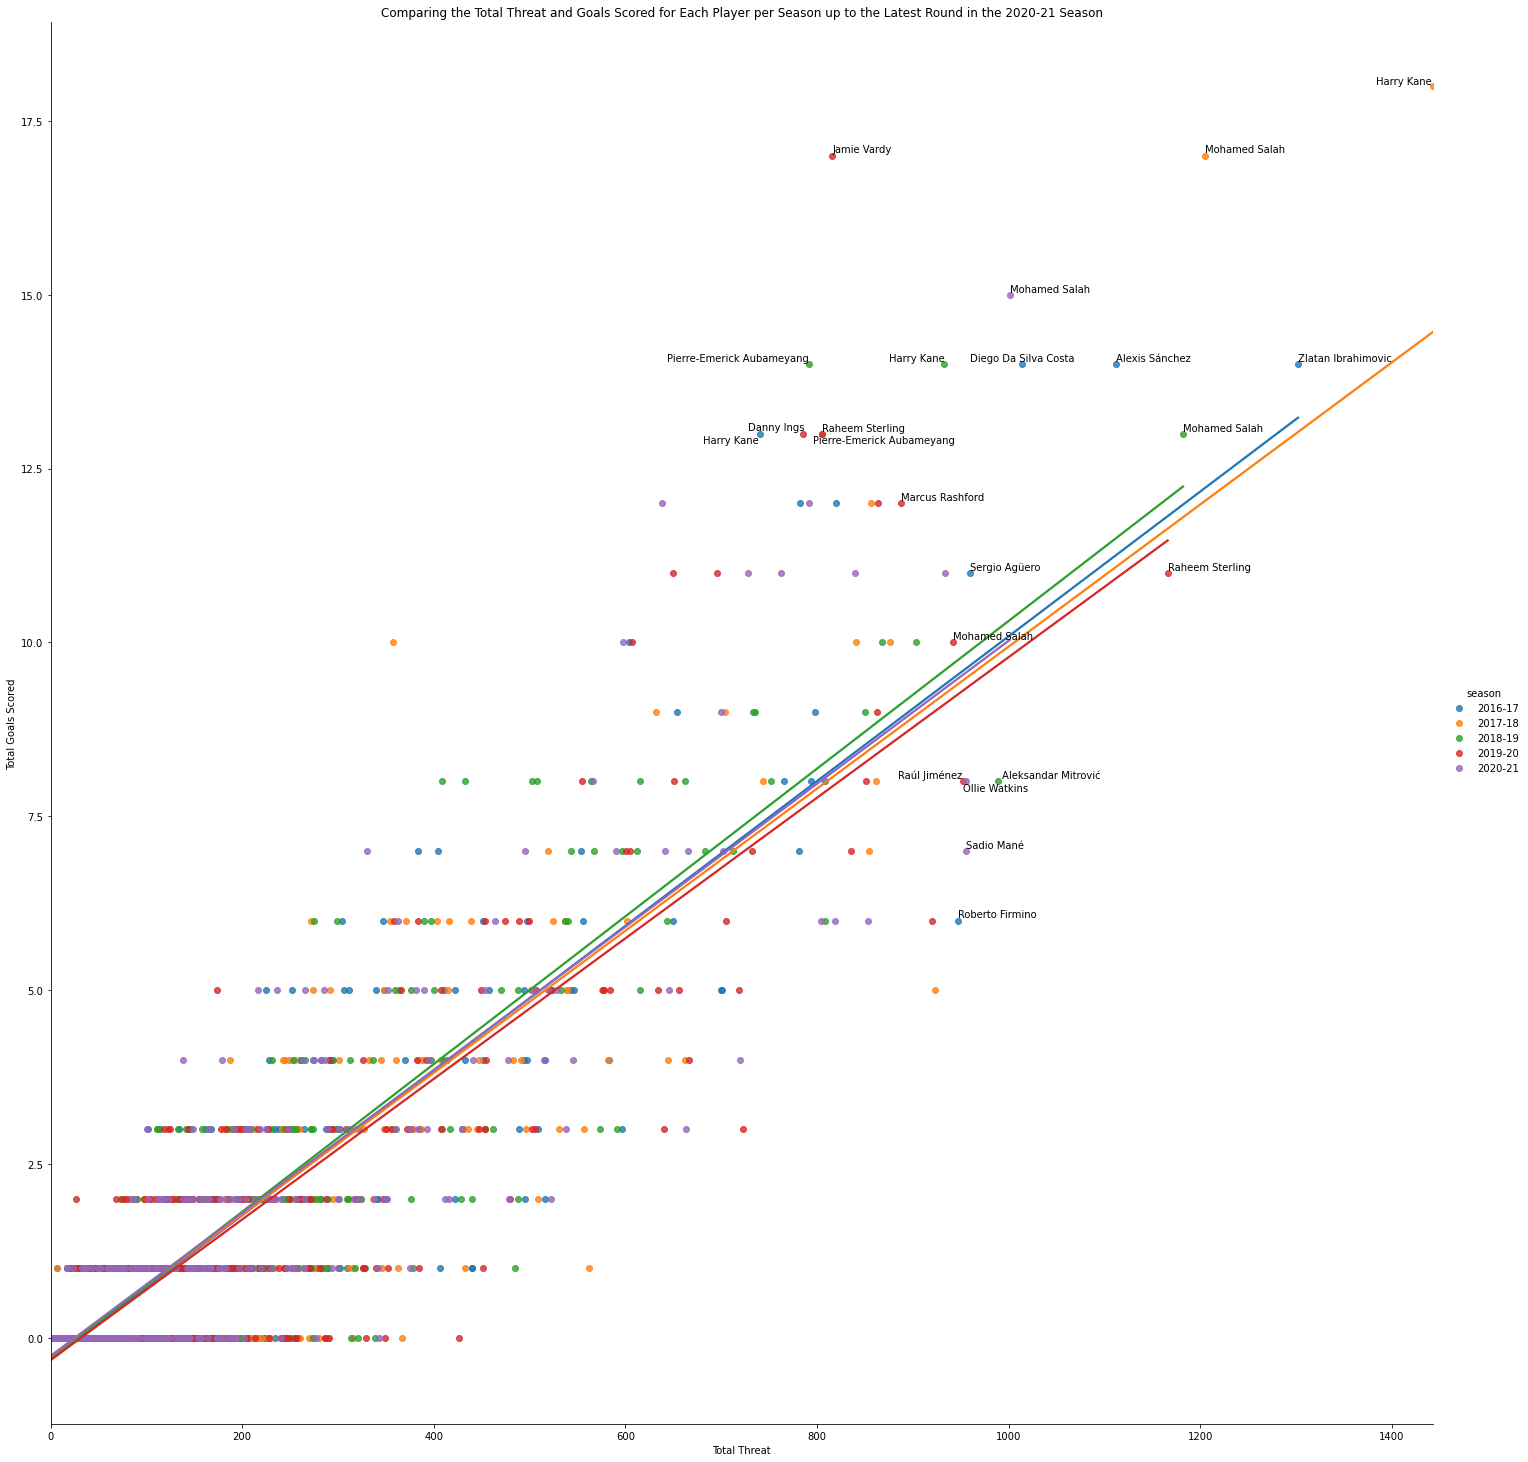

In [13]:
up_to_season_threat = up_to_season_totals.sort_values(by=['threat', 'goals_scored'], ascending=False)[:15]
up_to_season_goals_scored = up_to_season_totals.sort_values(by=['goals_scored', 'threat'], ascending=False)[:15]

up_to_season_tg_annotations = pd.concat([up_to_season_threat, up_to_season_goals_scored]).drop_duplicates()

fgrid = sns.lmplot(data=up_to_season_totals, x='threat', y='goals_scored', hue='season', ci=None, height=20);
ax = fgrid.axes[0, 0]
plt.title('Comparing the Total Threat and Goals Scored for Each Player per Season up to the Latest Round in the 2020-21 Season')

up_to_season_tg_texts = []
for i, row in up_to_season_tg_annotations.iterrows():
    up_to_season_tg_texts.append(ax.annotate(row['name'], (row['threat'], row['goals_scored'])))

plt.xlabel('Total Threat')
plt.ylabel('Total Goals Scored')
adjust_text(up_to_season_tg_texts, only_move={'points': 'y', 'texts': 'y'})
plt.savefig('IMAGES/up_to_season_total_threat_goals_scored.png')
plt.show()

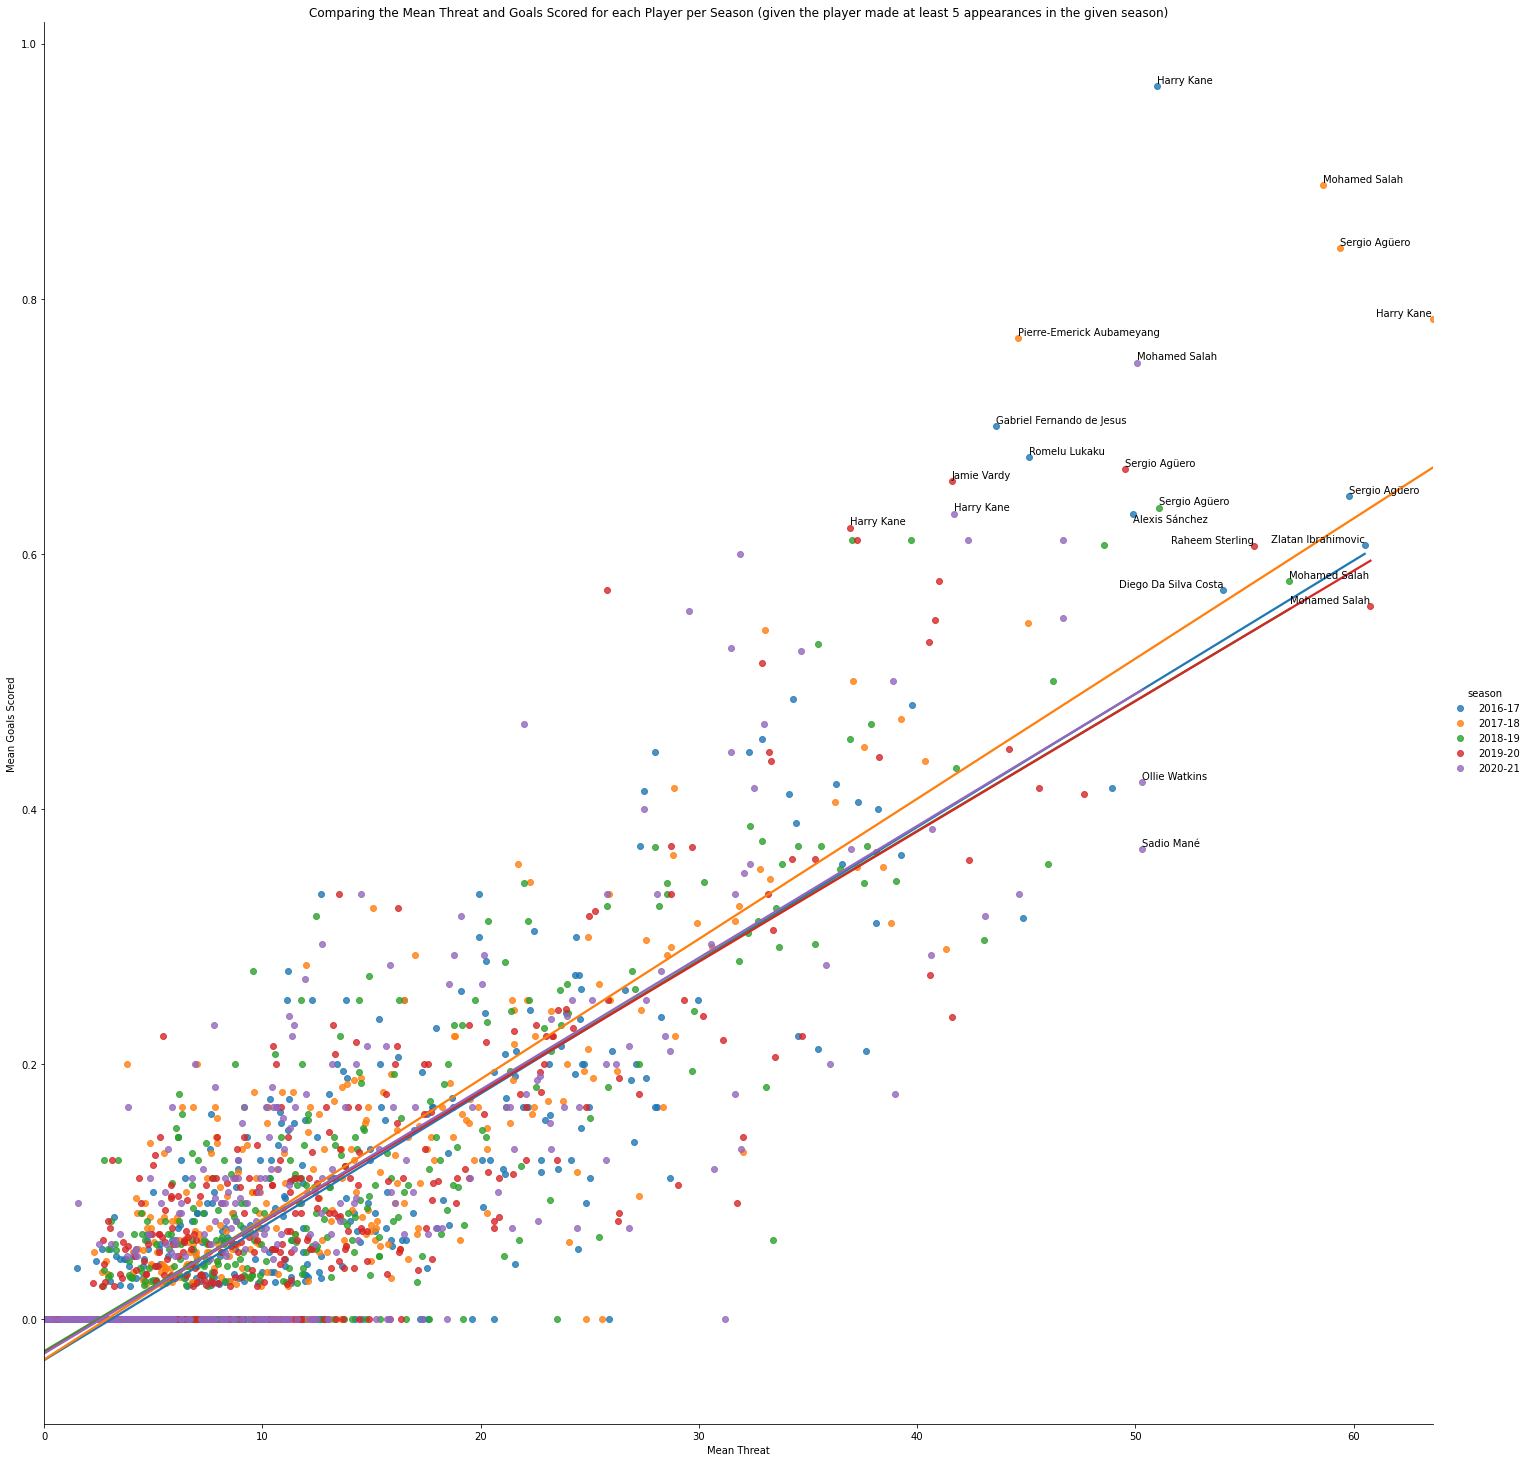

In [14]:
most_mean_threat = players_means.sort_values(by=['threat', 'goals_scored'], ascending=False)[:15]
most_mean_goals_scored = players_means.sort_values(by=['goals_scored', 'threat'], ascending=False)[:15]

mean_tg_annotations = pd.concat([most_mean_threat, most_mean_goals_scored]).drop_duplicates()

fgrid = sns.lmplot(data=players_means, x='threat', y='goals_scored', hue='season', ci=None, height=20);
ax = fgrid.axes[0, 0]
plt.title('Comparing the Mean Threat and Goals Scored for each Player per Season (given the player made at least 5 appearances in the given season)')

mean_tg_texts = []
for i, row in mean_tg_annotations.iterrows():
    mean_tg_texts.append(ax.annotate(row['name'], (row['threat'], row["goals_scored"])))

plt.xlabel('Mean Threat')
plt.ylabel('Mean Goals Scored')
adjust_text(mean_tg_texts, only_move={'points': 'y', 'texts': 'y'})
plt.savefig('IMAGES/mean_threat_goals_scored.png')
plt.show()

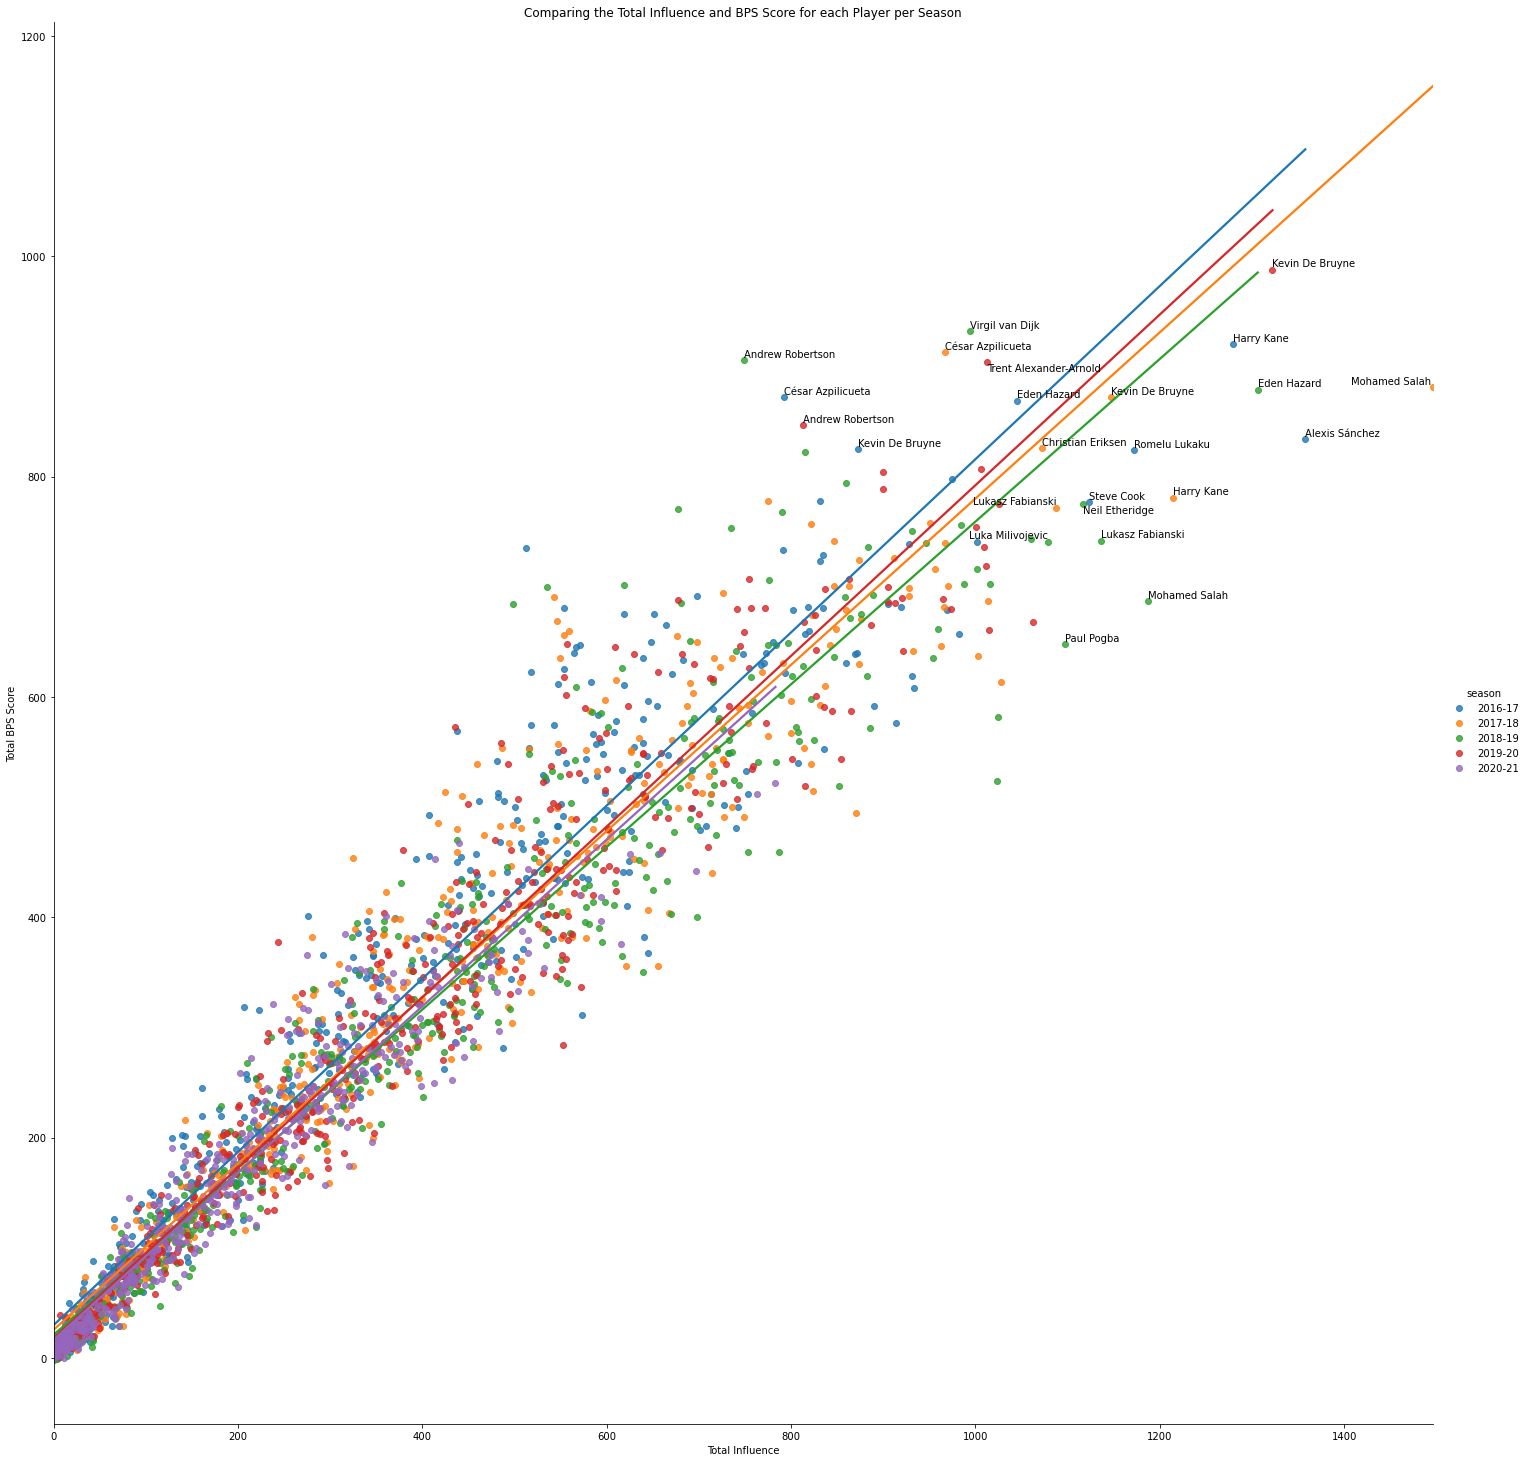

In [15]:
most_influence = players_totals.sort_values(by=['influence', 'bps'], ascending=False)[:15]
most_points = players_totals.sort_values(by=["bps", 'influence'], ascending=False)[:15]

ip_annotations = pd.concat([most_influence, most_points]).drop_duplicates()

fgrid = sns.lmplot(data=players_totals, x='influence', y='bps', hue='season', ci=None, height=20);
ax = fgrid.axes[0,0]
plt.title('Comparing the Total Influence and BPS Score for each Player per Season')

ip_texts = []
for i, row in ip_annotations.iterrows():
    ip_texts.append(ax.annotate(row['name'], (row['influence'], row['bps'])))

plt.xlabel('Total Influence')
plt.ylabel('Total BPS Score')
adjust_text(ip_texts, only_move={'points': 'y', 'texts': 'y'})
plt.savefig('IMAGES/total_influence_bps.png')
plt.show()

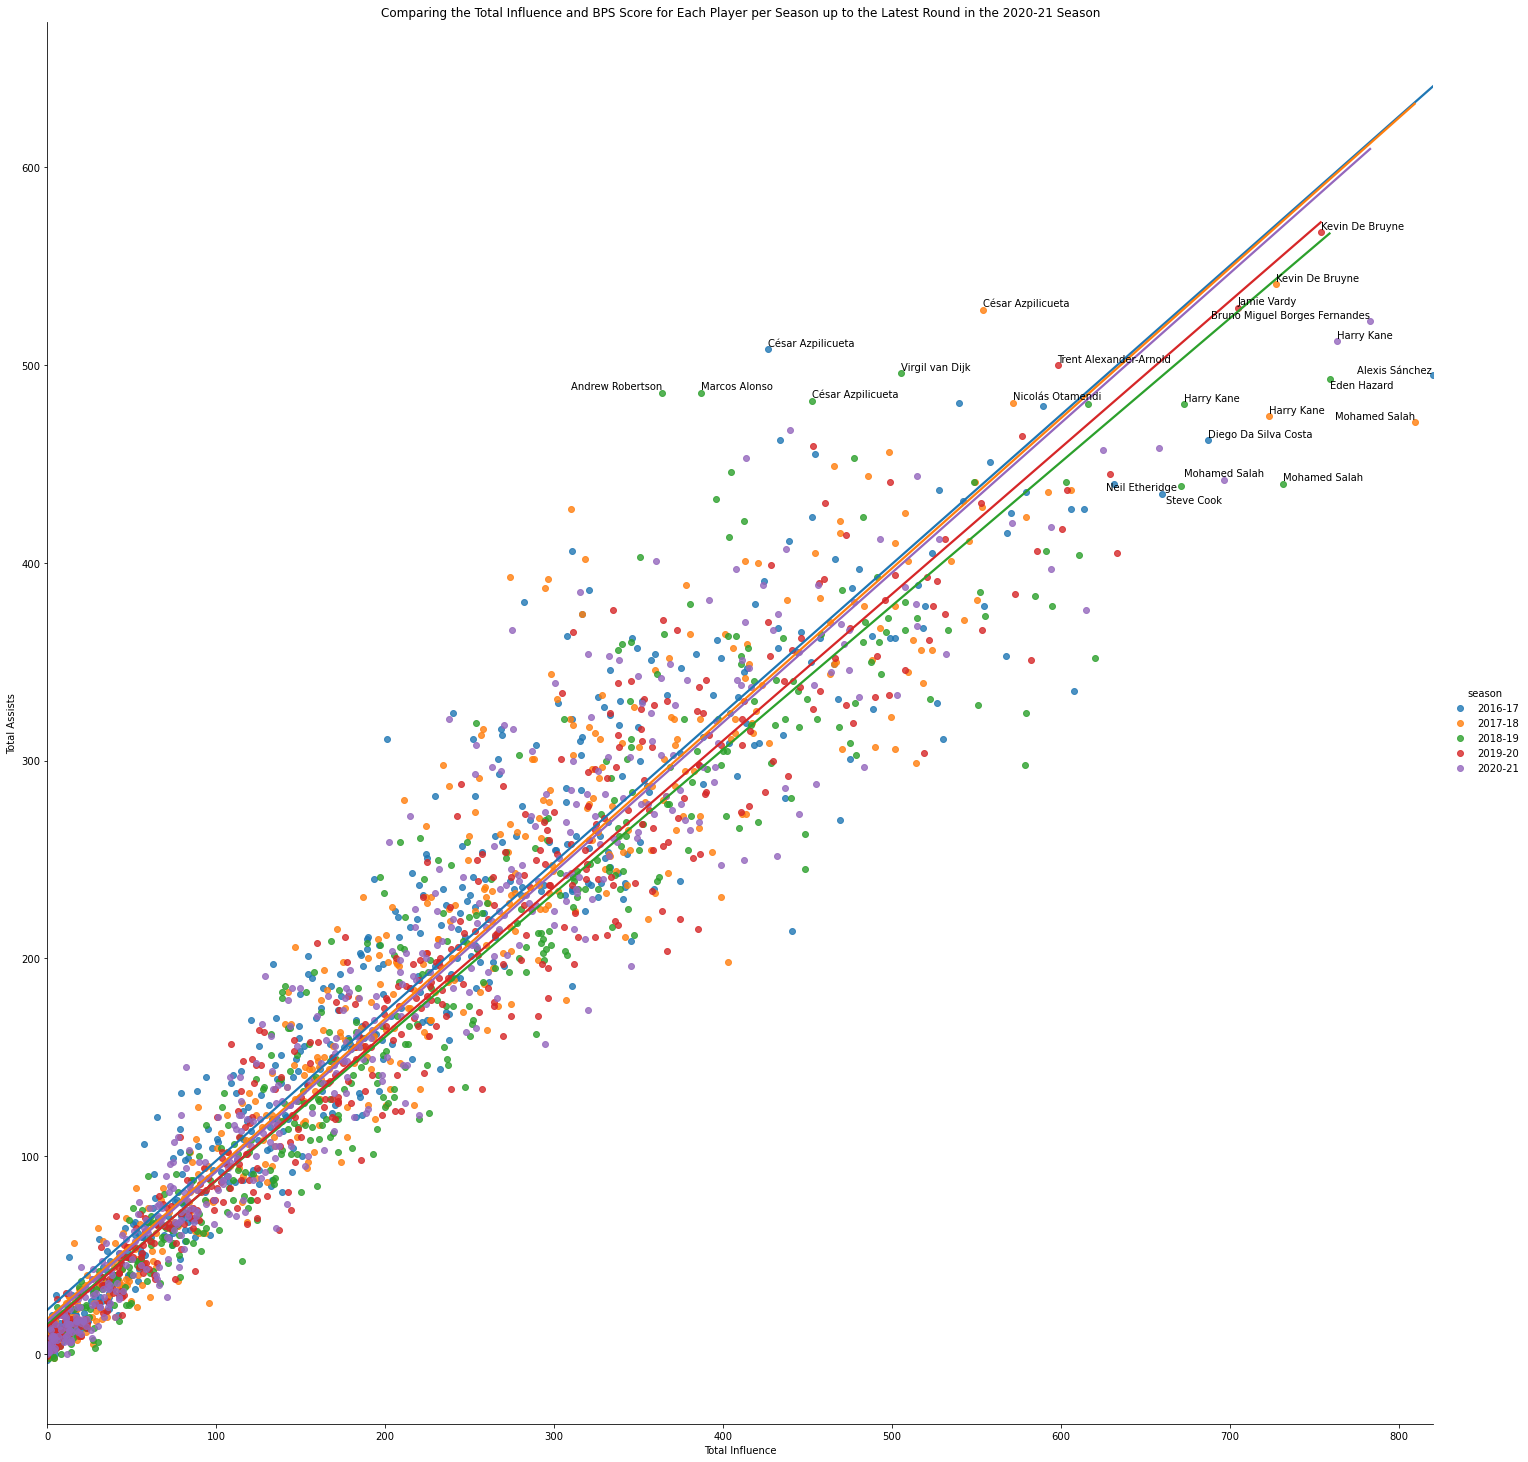

In [16]:
up_to_season_influence = up_to_season_totals.sort_values(by=['influence', 'bps'], ascending=False)[:15]
up_to_season_bps_score = up_to_season_totals.sort_values(by=['bps', 'influence'], ascending=False)[:15]

up_to_season_ip_annotations = pd.concat([up_to_season_influence, up_to_season_bps_score]).drop_duplicates()

fgrid = sns.lmplot(data=up_to_season_totals, x='influence', y='bps', hue='season', ci=None, height=20);
ax = fgrid.axes[0,0]
plt.title('Comparing the Total Influence and BPS Score for Each Player per Season up to the Latest Round in the 2020-21 Season')

up_to_season_ip_texts = []
for i, row in up_to_season_ip_annotations.iterrows():
    up_to_season_ip_texts.append(ax.annotate(row['name'], (row['influence'], row['bps'])))

plt.xlabel('Total Influence')
plt.ylabel('Total Assists')
adjust_text(up_to_season_ip_texts, only_move={'points': 'y', 'texts': 'y'})
plt.savefig('IMAGES/up_to_season_total_influence_bps.png')
plt.show()

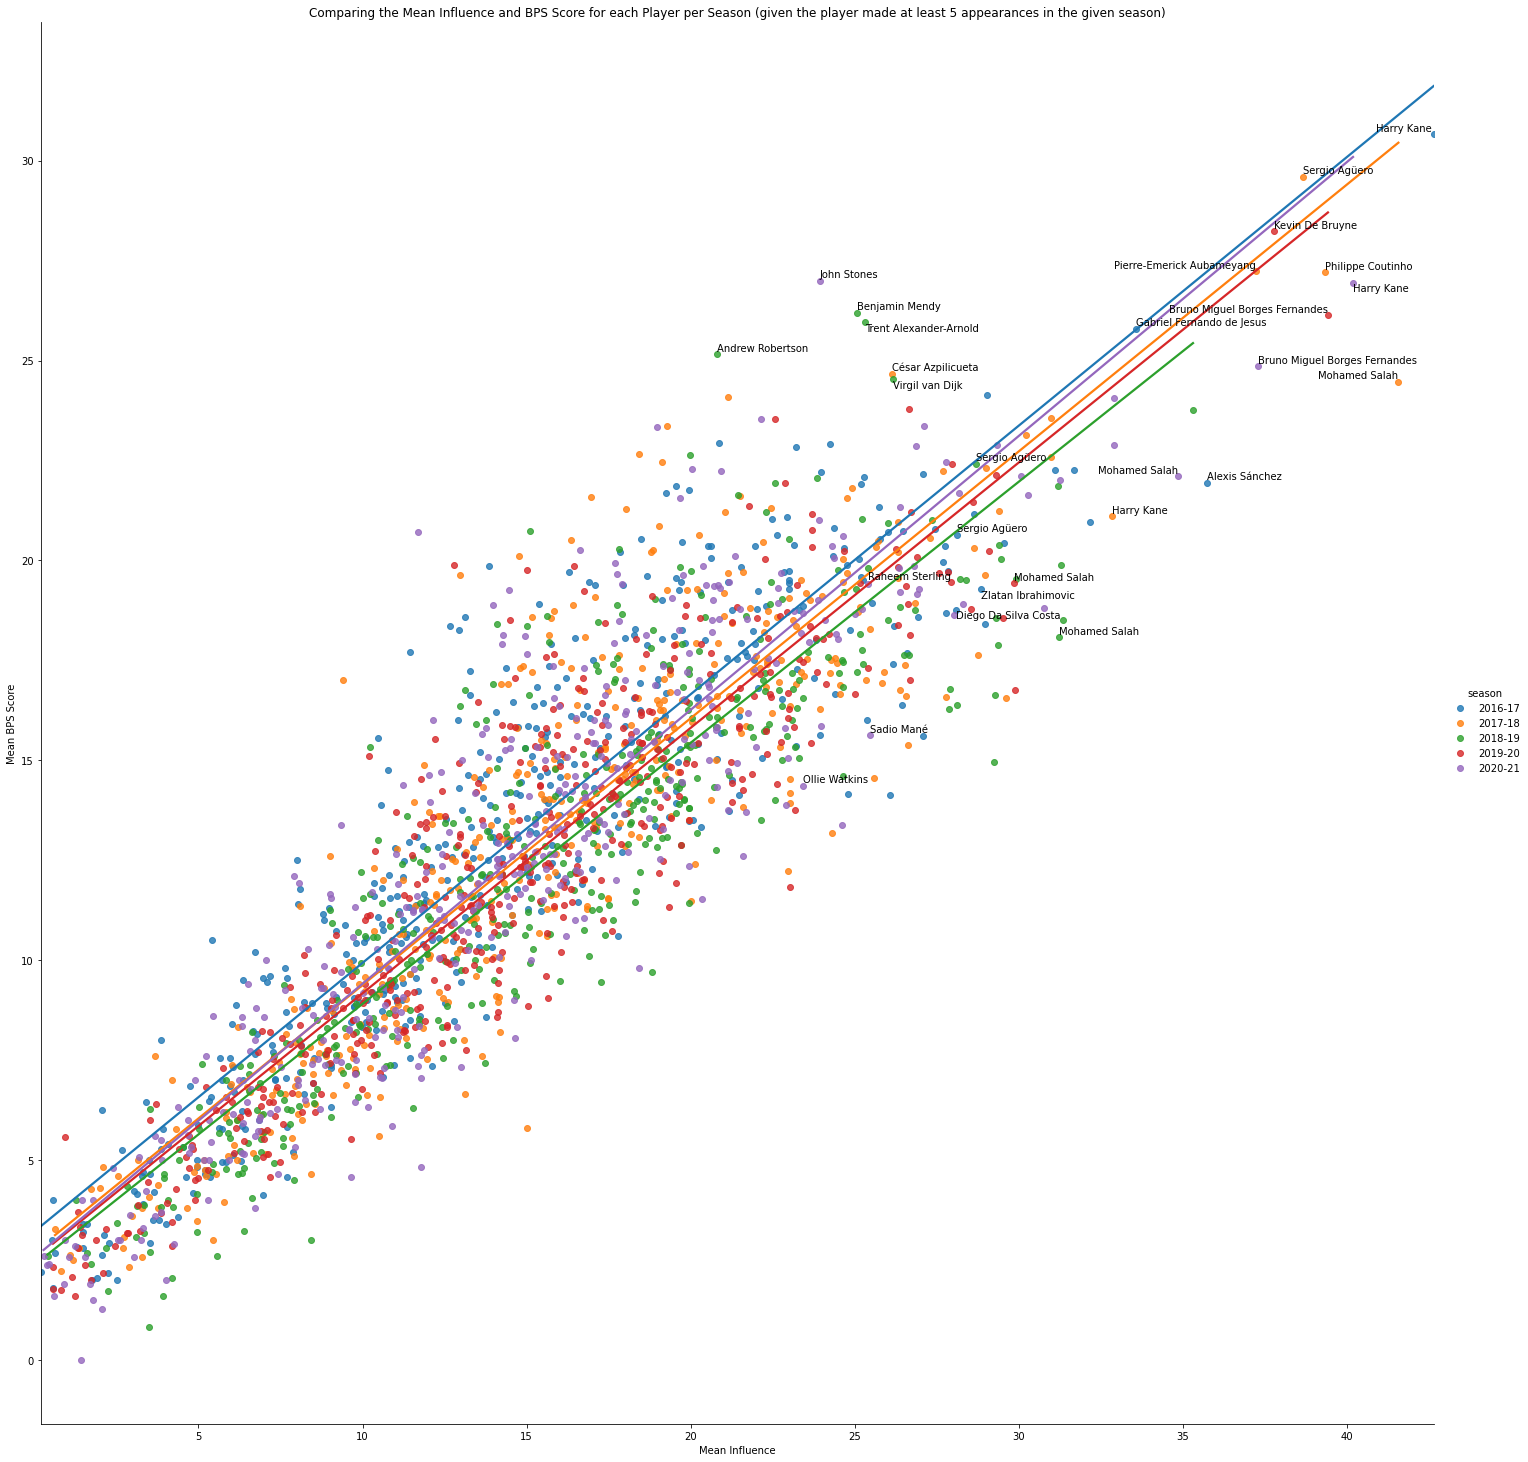

In [17]:
most_mean_influence = players_means.sort_values(by=['influence', 'bps'], ascending=False)[:15]
most_mean_bps_score = players_means.sort_values(by=['bps', 'influence'], ascending=False)[:15]

mean_ip_annotations = pd.concat([most_mean_threat, most_mean_bps_score]).drop_duplicates()

fgrid = sns.lmplot(data=players_means, x='influence', y='bps', hue='season', ci=None, height=20);
ax = fgrid.axes[0, 0]
plt.title('Comparing the Mean Influence and BPS Score for each Player per Season (given the player made at least 5 appearances in the given season)')

mean_ip_texts = []
for i, row in mean_ip_annotations.iterrows():
    mean_ip_texts.append(ax.annotate(row['name'], (row['influence'], row['bps'])))

plt.xlabel('Mean Influence')
plt.ylabel('Mean BPS Score')
adjust_text(mean_ip_texts, only_move={'points': 'y', 'texts': 'y'})
plt.savefig('IMAGES/mean_influence_bps.png')
plt.show()

---

### In my analysis I made use of match odds to get a teams win expectation before each game. I then plotted these win expectations to compare how each team fared in the seasons they participated in.

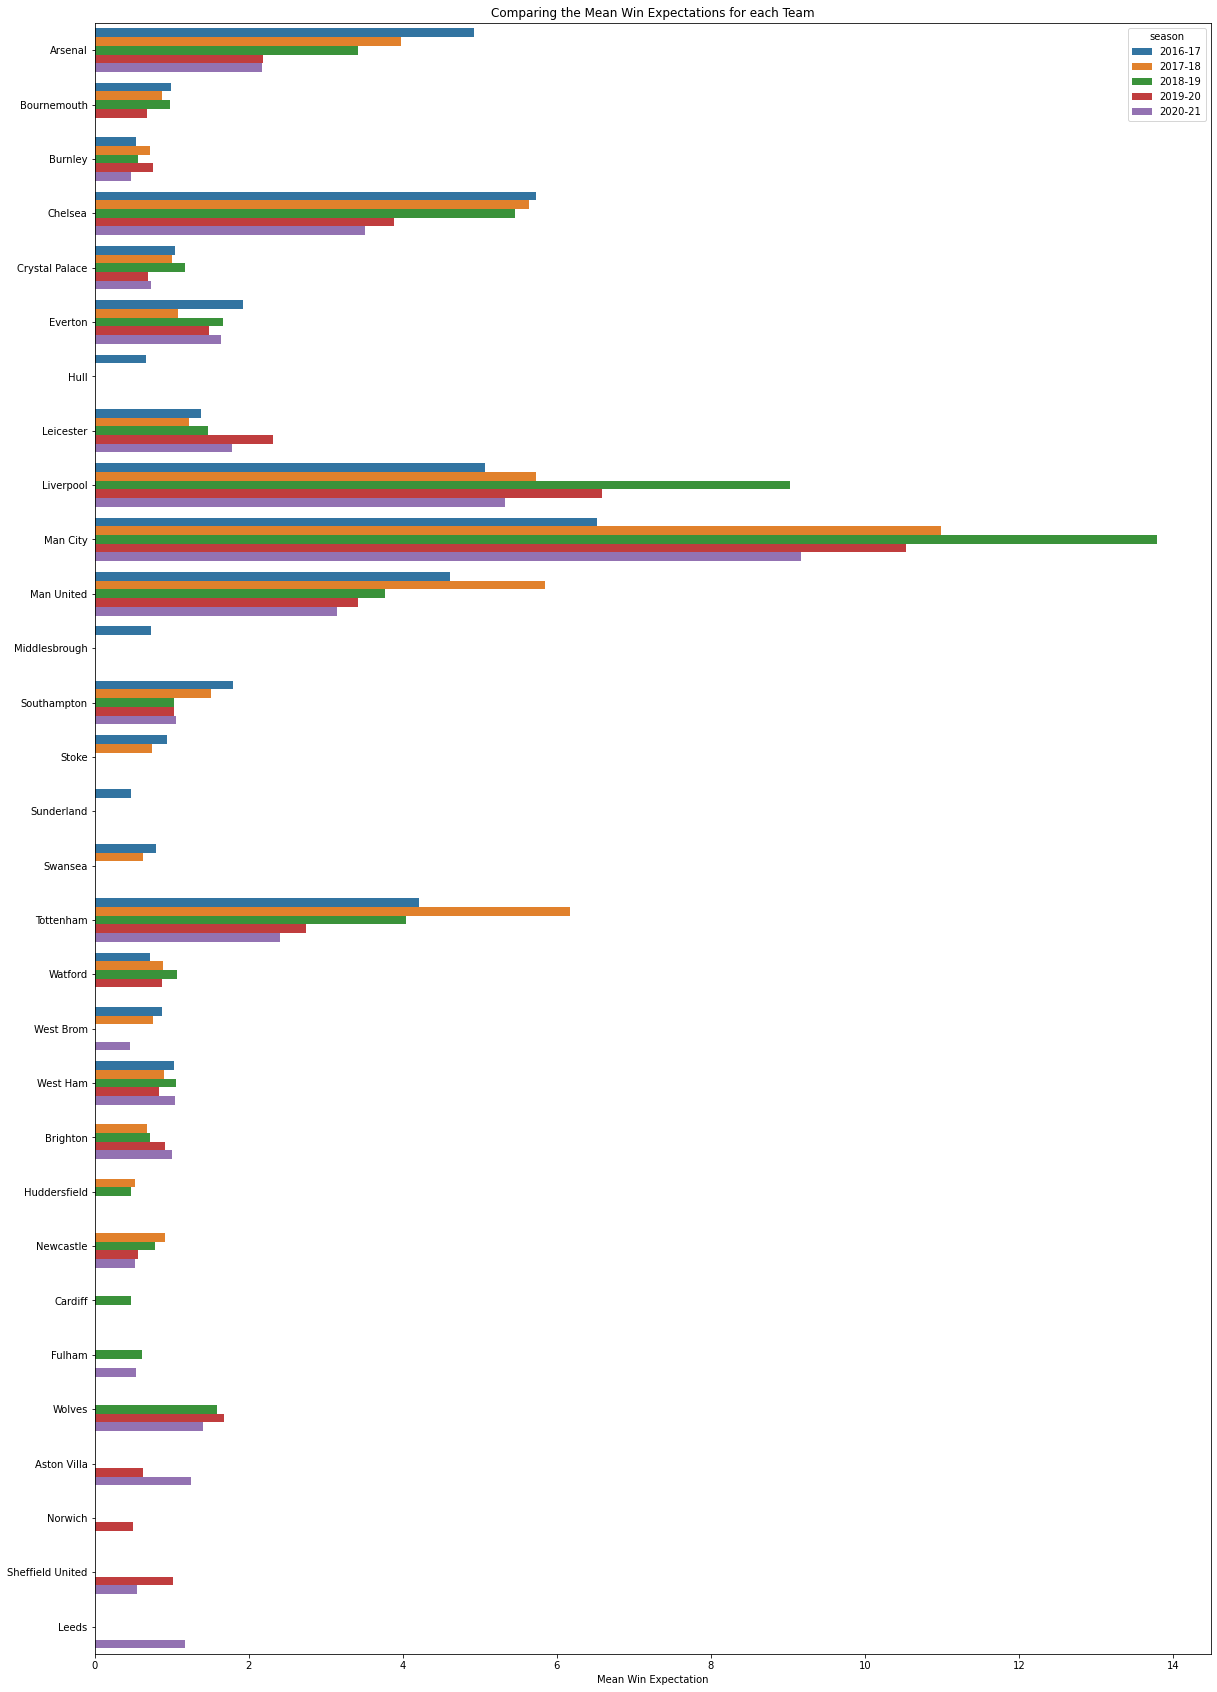

In [18]:
teams_mean = gameweeks.groupby(['season', 'plays_for']).mean().reset_index()

plt.figure(figsize=(20, 30))
plt.title('Comparing the Mean Win Expectations for each Team')


sns.barplot(data=teams_mean[['season', 'plays_for', 'win_expectation']], x='win_expectation', y='plays_for', hue='season')

plt.xlabel('Mean Win Expectation')
plt.ylabel('')
plt.savefig('IMAGES/mean_win_expectation_per_team.png')
plt.show()

### As we can see Manchester City are the dominant force in the Premier League, going into every game with an average of around a 10 win expectation, i.e. the odds of them winning were 10x higher than that of their opponent, almost double any other team. This was to be expected as they have been a dominant force under Guardiola, winning 2 of the 4 past full seasons.

### A suprising analysis is Liverpool. Liverpool have been contenders for the League in this same time period, actually winning it in 2019-20, and yet their win expectation has never been close to City's.

### Looking at the teams that have not been in the Premier League for all of the past 5 seasons, i.e. have gained promotion or been relegated, they have a mean win expectation of around 1 or less. This is to be expected as they will mos tlikely lose more games than they win. Leeds is an interesting team as they have a much larger win expectaion than any previously promoted team.

### Finally, looking at the 2020-21 season, every 'big' team has a much lower win expectation than in previous seasons, whilst teams like Southampton and Brighton have slightly larger. This evidents the quality of this season, upon which more teams are competing and are capable of taking points of the title challengers.

---

### In the 2017-18 season, Mohamed Salah earned 234 adjusted points, 44 more than the next highest sum since the 2016-17 season. This is an incredible amount and was the start of his recent dominance in the Premier League.

In [19]:
gameweeks.groupby(['season', 'name'])['adjusted_points'].sum().sort_values(ascending=False)[:10]

season   name           
2017-18  Mohamed Salah      234
2016-17  Alexis Sánchez     190
2019-20  Kevin De Bruyne    184
2018-19  Mohamed Salah      184
         Eden Hazard        170
         Raheem Sterling    169
2017-18  Raheem Sterling    167
2019-20  Mohamed Salah      166
2016-17  Harry Kane         165
2018-19  Sadio Mané         160
Name: adjusted_points, dtype: int64

---

### Lukasz Fabianski has been a consistent performer in the Premier League with many, including myself, believing him to be one of the best keepers in the league. This is evidented by the fact he has saved almost double the number of penalties, with 7, than any of keeper since the start of the 2016-17 season.

In [20]:
gameweeks.groupby('name')['penalties_saved'].sum().sort_values(ascending=False)[:10]

name
Lukasz Fabianski                 7
Jordan Pickford                  4
Kasper Schmeichel                4
Jonas Lössl                      3
Hugo Lloris                      3
Rui Pedro dos Santos Patrício    3
Simon Mignolet                   3
Neil Etheridge                   3
Ben Foster                       2
Ederson Santana de Moraes        2
Name: penalties_saved, dtype: int64

---

### For a penalty to be saved, it also has to be missed (of course a player could also miss the target). Since the start of the 2016-17 season both Jamie Vardy and Paul Pogba has missed 4 penalties.

In [21]:
gameweeks.groupby('name')['penalties_missed'].sum().sort_values(ascending=False)[:10]

name
Jamie Vardy                  4
Paul Pogba                   4
Christian Benteke            3
Riyad Mahrez                 3
Wayne Rooney                 3
Raheem Sterling              3
Gabriel Fernando de Jesus    3
Troy Deeney                  3
Gylfi Sigurdsson             3
Luka Milivojevic             2
Name: penalties_missed, dtype: int64

---

### A players value fluctuates throughout the season depending on the number of FPL managers transferring that player in and out of their team. As we can see Mohamed Salah in the 2018-19 season had the highest average value of any player. In fact of the top 10 average values, we see there are only 5 different players, with Mohammed Salah, appearing 3 times.

In [22]:
gameweeks.groupby(['season', 'name'])['value'].mean().sort_values(ascending=False)[:10]

season   name           
2018-19  Mohamed Salah      131.815789
2016-17  Sergio Agüero      128.806452
2017-18  Harry Kane         128.000000
2019-20  Mohamed Salah      124.823529
2018-19  Harry Kane         124.678571
2020-21  Mohamed Salah      123.450000
2019-20  Sadio Mané         120.800000
         Sergio Agüero      119.541667
2020-21  Sadio Mané         119.473684
2019-20  Raheem Sterling    119.121212
Name: value, dtype: float64

---

### As we can seem in the 2018-19 season we had 2 goalkeepers battling for the golden glove, with Alisson Becker just beating Ederson with a total of 21 clean sheets. Despite this it was Manchester City and Ederson who lifted the Premier League trophy.

In [23]:
gameweeks[gameweeks['position']=='GK'].groupby(['season', 'name'])['clean_sheets'].sum().sort_values(ascending=False)[:10]

season   name                     
2018-19  Alisson Ramses Becker        21
         Ederson Santana de Moraes    20
2017-18  David de Gea                 18
2016-17  Thibaut Courtois             16
2017-18  Ederson Santana de Moraes    16
2019-20  Ederson Santana de Moraes    16
2017-18  Thibaut Courtois             15
2016-17  Hugo Lloris                  15
2017-18  Hugo Lloris                  15
2019-20  Nick Pope                    15
Name: clean_sheets, dtype: int64

---

### Oriol Romeu has earned 43 yellow cards, 5 more than the next highest earners Luka Milivojevic and José Holebas.

In [24]:
gameweeks.groupby('name')['yellow_cards'].sum().sort_values(ascending=False)[:10]

name
Oriol Romeu Vidal     43
Luka Milivojevic      38
José Holebas          38
Granit Xhaka          37
Abdoulaye Doucouré    35
Ashley Barnes         32
Etienne Capoue        30
Wilfried Zaha         30
Jonny Evans           29
Harry Maguire         29
Name: yellow_cards, dtype: int64

### Despite this, it is Etienne Capoue and José Holebas who have earned the most yellow cards in a single season with 14. Oriol Romeu doesn't appear in the top 10 most cards earned in 1 season, so must average a consistent number (around 10) per season.

In [25]:
gameweeks.groupby(['season', 'name'])['yellow_cards'].sum().sort_values(ascending=False)[:10]

season   name                     
2016-17  José Holebas                 14
2018-19  Etienne Capoue               14
         Sokratis Papastathopoulos    12
2016-17  Danny Simpson                12
2018-19  Ryan Bennett                 12
         Fabian Schär                 12
         José Holebas                 12
         Jefferson Lerma              12
2019-20  Luka Milivojevic             12
2016-17  Idrissa Gueye                11
Name: yellow_cards, dtype: int64

---

### Fernandinho has earned 4 red cards, averaging 1 per full season.

In [26]:
gameweeks.groupby('name')['red_cards'].sum().sort_values(ascending=False)[:10]

name
Fernando Luiz Rosa            4
Simon Francis                 3
Christian Kabasele            3
Granit Xhaka                  3
David Luiz Moreira Marinho    3
Miguel Britos                 3
Heung-Min Son                 3
Christian Benteke             2
Wilfred Ndidi                 2
Wes Morgan                    2
Name: red_cards, dtype: int64

---

### There are 32 different players who have played every minute of the season in at least 1 of the past 4 full seasons, with Jordan Pickford and Ben Foster doing it in 3. From the value counts of the positions of these players it is not suprising to see that 24 of the 42 occurences were goalkeepers.

In [27]:
minutes_per_season = gameweeks.groupby(['season', 'name', 'position'])['minutes'].sum().sort_values(ascending=False)

every_minute = minutes_per_season[(minutes_per_season == 3420)].reset_index()

print('Number of times its happened:', len(every_minute), '\n')
print('Number of players who have achieved:', len(every_minute['name'].unique()), '\n')
print(every_minute['name'].value_counts(), '\n')
print(every_minute['position'].value_counts())

Number of times its happened: 42 

Number of players who have achieved: 31 

Jordan Pickford                  3
Ben Foster                       3
Martin Dubravka                  2
Harry Maguire                    2
Conor Coady                      2
Lukasz Fabianski                 2
David de Gea                     2
Mathew Ryan                      2
Kasper Schmeichel                2
George Baldock                   1
Ederson Santana de Moraes        1
Neil Etheridge                   1
Ben Gibson                       1
Asmir Begovic                    1
James Ward-Prowse                1
Declan Rice                      1
Alfie Mawson                     1
Mathias Jorgensen                1
Jonas Lössl                      1
Virgil van Dijk                  1
César Azpilicueta                1
Jack Cork                        1
Fraser Forster                   1
Lewis Dunk                       1
Luka Milivojevic                 1
Steve Cook                       1
Rui Pedro dos